<a href="https://colab.research.google.com/github/Ela-Na/Ryerson-cind860/blob/main/Ela_assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os
print("current working dir", os.getcwd())

import numpy as np
print("np", np.__version__)

import sys

import keras
from tensorflow import keras

import tensorflow as tf
print("tf", tf.__version__)
print("tf.keras", tf.keras.__version__)

import pandas as pd

import matplotlib.pyplot as plt

from tensorflow.python.client import device_lib 

from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image # Module with imagepreprocessing utilities

# keras functions through tensorflow
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model

from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers

current working dir /content
np 1.21.5
tf 2.8.0
tf.keras 2.8.0


In [ ]:
''' import shutil
shutil.unpack_archive("/content/drive/MyDrive/OCT2017.tar.gz", "/content/drive/MyDrive/OCT2017_2")'''

In [94]:
train_dir = '/content/drive/MyDrive/OCT2017_2/OCT2017/train'
train_normal = '/content/drive/MyDrive/OCT2017_2/OCT2017/train/NORMAL'
train_cnv = '/content/drive/MyDrive/OCT2017_2/OCT2017/train/CNV'
train_drusen = '/content/drive/MyDrive/OCT2017_2/OCT2017/train/DRUSEN'
train_dme = '/content/drive/MyDrive/OCT2017_2/OCT2017/train/DME'

In [95]:
validation_dir = '/content/drive/MyDrive/OCT2017_2/OCT2017/val'
val_normal = '/content/drive/MyDrive/OCT2017_2/OCT2017/val/NORMAL'
val_cnv = '/content/drive/MyDrive/OCT2017_2/OCT2017/val/CNV'
val_drusen = '/content/drive/MyDrive/OCT2017_2/OCT2017/val/DRUSEN'
val_dme = '/content/drive/MyDrive/OCT2017_2/OCT2017/val/DME'

In [96]:
test_dir = '/content/drive/MyDrive/OCT2017_2/OCT2017/test'
test_normal = '/content/drive/MyDrive/OCT2017_2/OCT2017/test/NORMAL'
test_cnv = '/content/drive/MyDrive/OCT2017_2/OCT2017/test/CNV'
test_drusen = '/content/drive/MyDrive/OCT2017_2/OCT2017/test/DRUSEN'
test_dme = '/content/drive/MyDrive/OCT2017_2/OCT2017/test/DME'

In [97]:
train_datagen = ImageDataGenerator(rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   rescale=1.0/255,
                                   horizontal_flip=True,
                                   fill_mode='nearest')
valid_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [98]:
train_generator1 = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=150,
    class_mode='binary')

val_generator1 = valid_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=150,
    class_mode='binary')

test_generator1 = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=150,
    class_mode='binary')

Found 8253 images belonging to 4 classes.
Found 32 images belonging to 4 classes.
Found 1000 images belonging to 4 classes.


In [ ]:
for data_batch, labels_batch in train_generator1:
  print('data batch shape:', data_batch.shape)
  print('labels batch shape:', labels_batch.shape)
  break

data batch shape: (150, 150, 150, 3)
labels batch shape: (150,)


In [ ]:
sample_training_images, _ = next(train_generator1)


# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(10, 10, figsize=(100,100))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

plotImages(sample_training_images[:100])

In [ ]:
import matplotlib.pyplot as plt

def plotImages(images_arr):
    fig, axes = plt.subplots(10, 15, figsize=(10,10))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

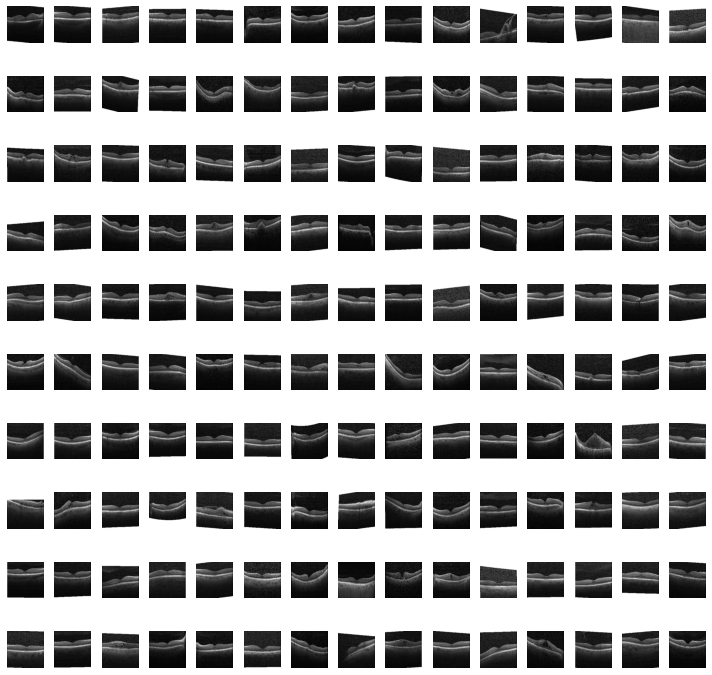

In [ ]:
images_tg = train_generator1[0][0]
images_arr = np.array(images_tg)
plotImages(images_arr)

In [ ]:
!pip install -q easyimages

     |████████████████████████████████| 88 kB 3.7 MB/s 


In [ ]:
!pip install -q basic-image-eda


In [ ]:
# latest version
# pip install git+https://github.com/Soongja/basic-image-eda



found 26315 images.
Using 2 threads. (max:2)



100%|██████████| 26315/26315 [06:18<00:00, 69.51it/s]



*--------------------------------------------------------------------------------------*
number of images                         |  26315

dtype                                    |  uint8
channels                                 |  [1]
extensions                               |  ['jpeg']

min height                               |  496
max height                               |  512
mean height                              |  500.1326999809994
median height                            |  496

min width                                |  384
max width                                |  1536
mean width                               |  659.6706061181835
median width                             |  512

mean height/width ratio                  |  0.7581551994926965
median height/width ratio                |  0.96875
recommended input size(by mean)          |  [504 656] (h x w, multiples of 8)
recommended input size(by mean)          |  [496 656] (h x w, multiples of 16)
recommended input si

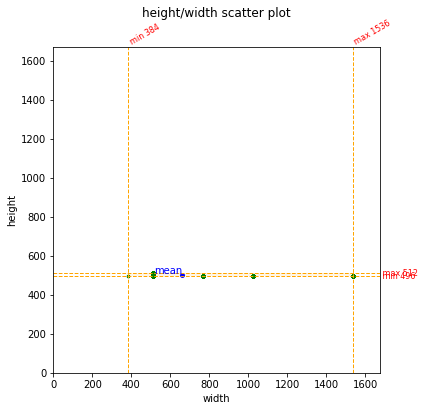

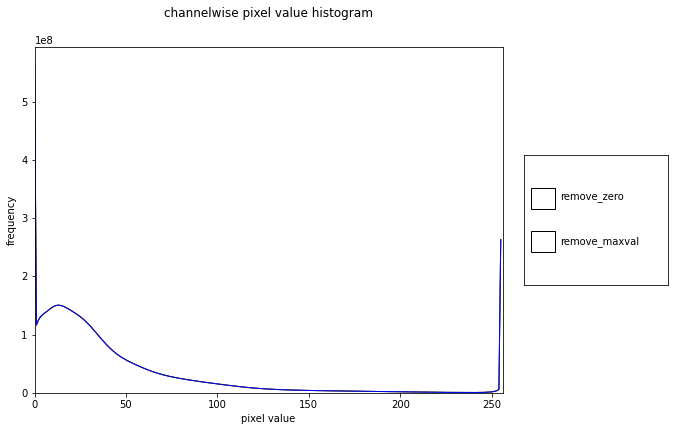


found 37205 images.
Using 2 threads. (max:2)



100%|██████████| 37205/37205 [09:26<00:00, 65.69it/s]



*--------------------------------------------------------------------------------------*
number of images                         |  37205

dtype                                    |  uint8
channels                                 |  [1]
extensions                               |  ['jpeg']

min height                               |  496
max height                               |  496
mean height                              |  496.0
median height                            |  496

min width                                |  384
max width                                |  1536
mean width                               |  736.3724230614165
median width                             |  512

mean height/width ratio                  |  0.6735722094778005
median height/width ratio                |  0.96875
recommended input size(by mean)          |  [496 736] (h x w, multiples of 8)
recommended input size(by mean)          |  [496 736] (h x w, multiples of 16)
recommended input size(by mean) 

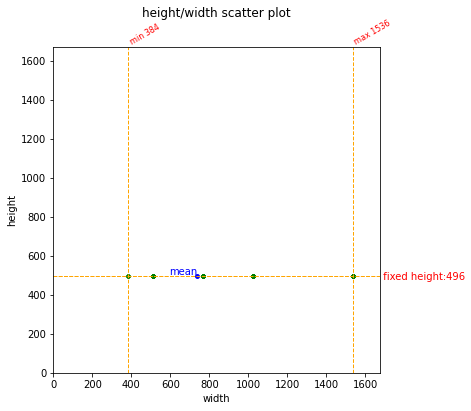

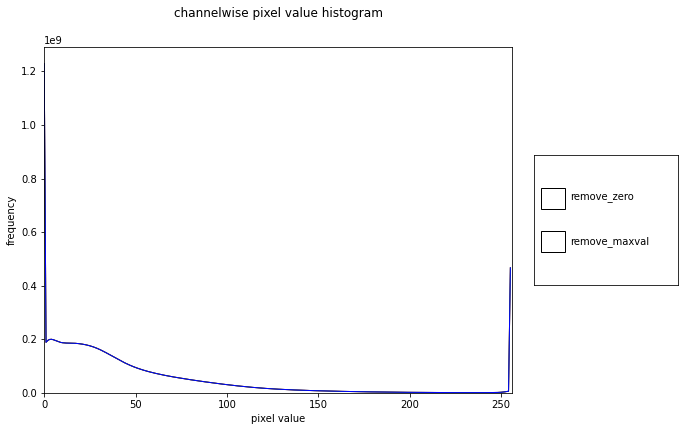


found 11348 images.
Using 2 threads. (max:2)



100%|██████████| 11348/11348 [02:32<00:00, 74.45it/s]



*--------------------------------------------------------------------------------------*
number of images                         |  11348

dtype                                    |  uint8
channels                                 |  [1]
extensions                               |  ['jpeg']

min height                               |  496
max height                               |  512
mean height                              |  508.20867113147693
median height                            |  512

min width                                |  512
max width                                |  1536
mean width                               |  564.7881565033487
median width                             |  512

mean height/width ratio                  |  0.8998217566703945
median height/width ratio                |  1.0
recommended input size(by mean)          |  [512 568] (h x w, multiples of 8)
recommended input size(by mean)          |  [512 560] (h x w, multiples of 16)
recommended input size(

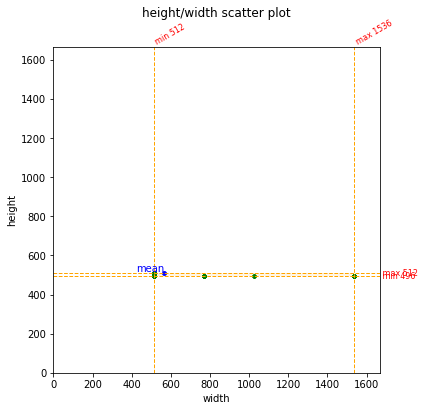

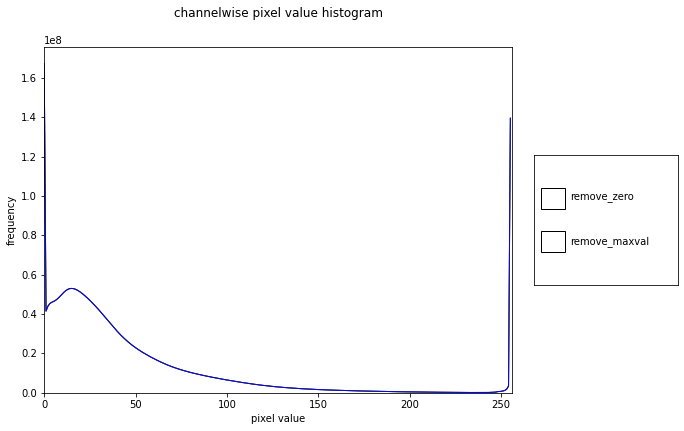


found 8616 images.
Using 2 threads. (max:2)



100%|██████████| 8616/8616 [01:53<00:00, 76.02it/s]



*--------------------------------------------------------------------------------------*
number of images                         |  8616

dtype                                    |  uint8
channels                                 |  [1]
extensions                               |  ['jpeg']

min height                               |  496
max height                               |  496
mean height                              |  496.0
median height                            |  496

min width                                |  512
max width                                |  1536
mean width                               |  670.6926648096564
median width                             |  512

mean height/width ratio                  |  0.7395339564966996
median height/width ratio                |  0.96875
recommended input size(by mean)          |  [496 672] (h x w, multiples of 8)
recommended input size(by mean)          |  [496 672] (h x w, multiples of 16)
recommended input size(by mean)  

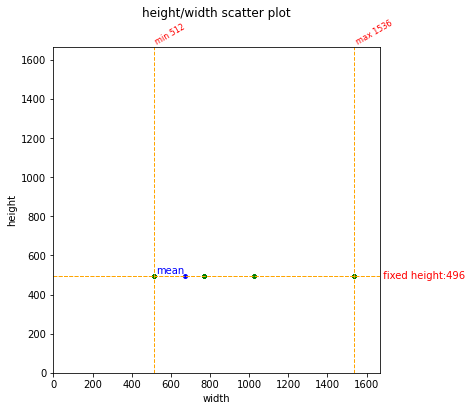

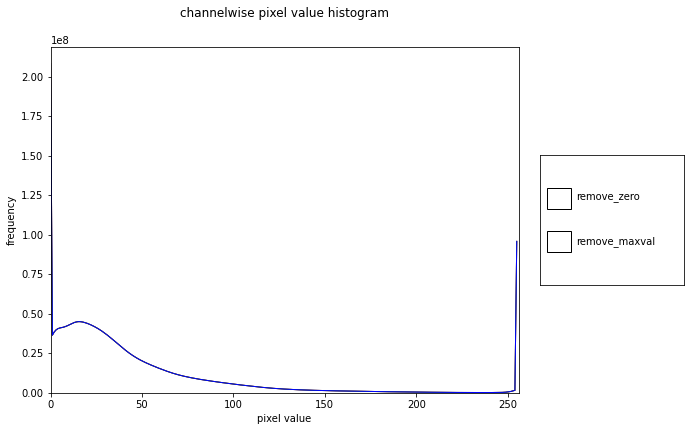

In [ ]:
from basic_image_eda import BasicImageEDA


data_dir1 = '/content/drive/MyDrive/OCT2017_2/OCT2017/train/NORMAL/'
data_dir2 = '/content/drive/MyDrive/OCT2017_2/OCT2017/train/CNV/'
data_dir3 = '/content/drive/MyDrive/OCT2017_2/OCT2017/train/DME/'
data_dir4 = '/content/drive/MyDrive/OCT2017_2/OCT2017/train/DRUSEN/'

dirs = [data_dir1, data_dir2, data_dir3, data_dir4]
extensions = ['png', 'jpg', 'jpeg']
threads = 0
dimension_plot = True
channel_hist = True
nonzero = False
hw_division_factor = 1.0

for dir in dirs:

  BasicImageEDA.explore(dir, extensions, threads, dimension_plot, channel_hist, nonzero, hw_division_factor)

In [ ]:
# to check whether there is corrupted images in the dataset

In [ ]:
!pip install -q pandas-profiling
#!pip install -U -q pandas-profiling


In [ ]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip


In [ ]:
import pandas_profiling as pdpf

In [ ]:
import os
import pandas as pd

BASE_DIR = '/content/drive/MyDrive/OCT2017_2/OCT2017/train/'
train_cnv = BASE_DIR+'CNV/'
train_dme = BASE_DIR+'DME/'
train_normal = BASE_DIR+'NORMAL/'
train_drusen = BASE_DIR+'DRUSEN/'

images_cnv = sorted(os.listdir(train_cnv))
images_dme = sorted(os.listdir(train_dme))
images_drusen = sorted(os.listdir(train_drusen))
images_normal = sorted(os.listdir(train_normal))

images1=[i for i in images_cnv]
images2=[i for i in images_dme]
images3=[i for i in images_drusen]
images4=[i for i in images_normal]

train_images = [images1, images2, images3, images4]

length = []
max_l = 0

for l in train_images:
  length.append(len(l))

for l in length:
  if l > length[0]:
    max_l = l
  else:
    max_l = length[0]


df1 = pd.DataFrame()
df2 = pd.DataFrame()
df3 = pd.DataFrame()
df4 = pd.DataFrame()
df1['cnv']=[train_cnv+str(x) for x in images1]
df2['dme']=[train_dme+str(x) for x in images2]
df3['drusen']=[train_drusen+str(x) for x in images3]
df4['normal']=[train_normal+str(x) for x in images4]

'''
for n in range(len(df1), max_l):
  df1['cnv'].append("NaN")

for n in range(len(df2), max_l):
  df2['dme'].append("NaN")

for n in range(len(df3), max_l):
  df3['drusen'].append("NaN")

for n in range(len(df4), max_l):
  df4['normal'].append("NaN")
'''
df = pd.DataFrame()

df = pd.concat([df1, df2, df3, df4], axis=1, join='outer', ignore_index = True)


#df['oct'] = [train_cnv+str(x) for x in images1]
#df['label'] = ['cnv' for 'cnv' in range(len(images1))]
cnv_df = df.to_csv('/content/drive/MyDrive/OCT2017_2/OCT2017/train/oct_train.csv', index =False, header=None)
'''
dme_df = df2.to_csv('/content/drive/MyDrive/OCT2017_2/OCT2017/train/oct_dme.csv', index =False, header=None)
drusen = df3.to_csv('/content/drive/MyDrive/OCT2017_2/OCT2017/train/oct_drusen.csv', index =False, header=None)
normal_df = df4.to_csv('/content/drive/MyDrive/OCT2017_2/OCT2017/train/oct_normal.csv', index =False, header=None)'''

"\ndme_df = df2.to_csv('/content/drive/MyDrive/OCT2017_2/OCT2017/train/oct_dme.csv', index =False, header=None)\ndrusen = df3.to_csv('/content/drive/MyDrive/OCT2017_2/OCT2017/train/oct_drusen.csv', index =False, header=None)\nnormal_df = df4.to_csv('/content/drive/MyDrive/OCT2017_2/OCT2017/train/oct_normal.csv', index =False, header=None)"

In [ ]:
max_l
length


[37205, 11348, 8616, 26315]

In [ ]:
from pandas_profiling import ProfileReport


In [ ]:
profile = pdpf.ProfileReport(df)
print(profile)


In [ ]:
df.profile_report(style={'full_width':True})


ValidationError: ignored

In [ ]:
profile = df.profile_report(title='Pandas Profiling Report')
profile.to_file(output_file='OCT.pdf')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/pandas_profiling/profile_report.py:263: UserWarning: Extension .pdf not supported. For now we assume .html was intended. To remove this warning, please use .html or .json.
  f"Extension {suffix} not supported. For now we assume .html was intended. "


Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
profile

In [ ]:
profile = ProfileReport(df, title='Pandas Profiling Report', explorative=True)

In [ ]:
profile2 = df.profile_report(title='Pandas Profiling Report', plot={'histogram': {'bins': 8}})
profile2.to_file("oct2.pdf")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/pandas_profiling/profile_report.py:263: UserWarning: Extension .pdf not supported. For now we assume .html was intended. To remove this warning, please use .html or .json.
  f"Extension {suffix} not supported. For now we assume .html was intended. "


Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
profile2

In [ ]:
# Installing the opencv-python library
!pip install opencv-python


In [ ]:
# Importing the cv2 module
import cv2

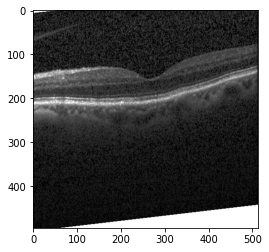

In [ ]:
import imageio


img = imageio.imread('/content/drive/MyDrive/train/NORMAL/NORMAL-1001666-1.jpeg')
img.shape  # im is a numpy array


img = img.astype(np.uint8)
img = img / 255
plt.imshow(img,cmap='gray')



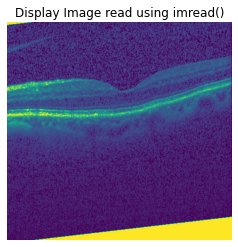

In [ ]:
img_array=plt.imread('/content/drive/MyDrive/train/NORMAL/NORMAL-1001666-1.jpeg') 
plt.imshow(img_array)
plt.title('Display Image read using imread()') 
plt.axis('off')
plt.show()

# Feature Selection

## 1- Feature Selection Machine Learning

## Feature Selection using SVM

In [ ]:
np.array(test_generator1[0][1]).shape

(150,)

In [99]:
import math

n = 150
#number_of_examples = len(test_batches.filenames)
number_generator = math.ceil(1000 / (1.0 * n)) 
# 1.0 above is to skip integer division

stest_label = []
stest_data = []

for i in range(0,int(number_generator)):
    stest_label.extend(np.array(test_generator1[i][1]))
    stest_data.extend(np.array(test_generator1[i][0]))


In [100]:
stest_label = np.array(stest_label)
stest_data = np.array(stest_data)

In [101]:
stest_label.shape

(1000,)

In [102]:
stest_data.shape

(1000, 150, 150, 3)

In [103]:
stest_data = stest_data.reshape([1000, 150*150*3])

In [104]:
np.array(val_generator1[0][0]).shape

(32, 150, 150, 3)

In [105]:
sval_label1 = []
sval_data1 = []

sval_label1.extend(np.array(val_generator1[0][1]))
sval_data1.extend(np.array(val_generator1[0][0]))

In [106]:
sval_label = np.array(sval_label1)
sval_data = np.array(sval_data1)

In [107]:
sval_label.shape

(32,)

In [108]:
sval_data.shape

(32, 150, 150, 3)

In [109]:
sval_data = sval_data.reshape (32, 150*150*3)

In [110]:
from sklearn.svm import SVC

svc = SVC(probability=True, random_state=10)
svc.fit(stest_data ,stest_label)


SVC(probability=True, random_state=10)

In [111]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(svc, stest_data, stest_label, cv=5)
np.average(scores)
np.mean(scores)

0.43500000000000005

In [112]:
svc_pred = svc.predict(sval_data)

In [113]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy_score(sval_label, svc_pred)


0.78125

In [114]:
confusion_matrix(sval_label, svc_pred)


array([[8, 0, 0, 0],
       [0, 3, 3, 2],
       [0, 0, 6, 2],
       [0, 0, 0, 8]])

In [115]:
tn, fp, fn, tp = confusion_matrix(sval_label, svc_pred)
svc_specificity = tn / (tn+fp)
svc_sensitivity = tp / (tp+fn)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


In [116]:
svc_specificity 

array([1., 0., 0., 0.])

In [117]:
svc_sensitivity 

array([nan, nan, 0. , 0.8])

In [ ]:
import seaborn as sns

# Get and reshape confusion matrix data
matrix = confusion_matrix(sval_label, svc_pred)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Yellows, linewidths=0.2)

# Add labels to the plot
class_names = ['CNV', 'DME', 'DRUSEN', 'Normal']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for UNet-XCeption Random Forest Model')
plt.show()

In [118]:
print(classification_report(sval_label, svc_pred))


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         8
         1.0       1.00      0.38      0.55         8
         2.0       0.67      0.75      0.71         8
         3.0       0.67      1.00      0.80         8

    accuracy                           0.78        32
   macro avg       0.83      0.78      0.76        32
weighted avg       0.83      0.78      0.76        32



In [139]:
from sklearn.ensemble import RandomForestClassifier

rforest = RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_leaf=2)

rforest.fit(stest_data, stest_label)
rf_pred = rforest.predict(sval_data)

In [132]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(rforest, stest_data, stest_label, cv=5)
np.average(scores)
np.mean(scores)

0.5549999999999999

In [140]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy_score(sval_label, rf_pred)


1.0

In [134]:
confusion_matrix(sval_label,rf_pred)

array([[8, 0, 0, 0],
       [0, 8, 0, 0],
       [0, 0, 8, 0],
       [0, 0, 0, 8]])

In [135]:
tn, fp, fn, tp = confusion_matrix(sval_label, rf_pred)
rf_specificity = tn / (tn+fp)
rf_sensitivity = tp / (tp+fn)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


In [136]:
rf_specificity 

array([ 1.,  0., nan, nan])

In [137]:
rf_sensitivity 

array([nan, nan,  0.,  1.])

In [ ]:
import seaborn as sns

# Get and reshape confusion matrix data
matrix = confusion_matrix(sval_label, rf_pred)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Oranges, linewidths=0.2)

# Add labels to the plot
class_names = ['CNV', 'DME', 'DRUSEN', 'Normal']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for UNet-XCeption Random Forest Model')
plt.show()

In [138]:
print(classification_report(sval_label, rf_pred))


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         8
         1.0       1.00      1.00      1.00         8
         2.0       1.00      1.00      1.00         8
         3.0       1.00      1.00      1.00         8

    accuracy                           1.00        32
   macro avg       1.00      1.00      1.00        32
weighted avg       1.00      1.00      1.00        32



## Feature Selection using PCA

In [141]:
np.array(test_generator1[0][1]).shape

(150,)

In [142]:
import math

n = 150
#number_of_examples = len(test_batches.filenames)
number_generator = math.ceil(1000 / (1.0 * n)) 
# 1.0 above is to skip integer division

ptest_label = []
ptest_data = []

for i in range(0,int(number_generator)):
    ptest_label.extend(np.array(test_generator1[i][1]))
    ptest_data.extend(np.array(test_generator1[i][0]))


In [143]:
ptest_label = np.array(ptest_label)
ptest_data = np.array(ptest_data)

In [144]:
ptest_label.shape

(1000,)

In [145]:
ptest_data.shape

(1000, 150, 150, 3)

In [148]:
ptest_data = ptest_data.reshape([1000, 150*150*3])

In [149]:
np.array(val_generator1[0][0]).shape

(32, 150, 150, 3)

In [150]:
pval_label1 = []
pval_data1 = []

pval_label1.extend(np.array(val_generator1[0][1]))
pval_data1.extend(np.array(val_generator1[0][0]))

In [151]:
pval_label = np.array(pval_label1)
pval_data = np.array(pval_data1)

In [152]:
pval_label.shape

(32,)

In [153]:
pval_data.shape

(32, 150, 150, 3)

In [154]:
pval_data = pval_data.reshape (32, 150*150*3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

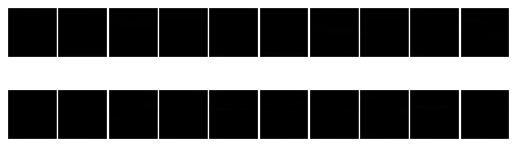

In [155]:
from sklearn.decomposition import PCA
#n_components=0.80 means it will return the Eigenvectors that have the 80% of the variation in the dataset
pca = PCA(n_components=0.8)
poct = pca.fit(ptest_data)
fig, axes = plt.subplots(2,10,figsize=(9,3),
 subplot_kw={'xticks':[], 'yticks':[]},
 gridspec_kw=dict(hspace=0.01, wspace=0.01))
for i, ax in enumerate(axes.flat):
  ax.imshow(poct.components_[i].reshape(150,150, 3), cmap='gray')


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

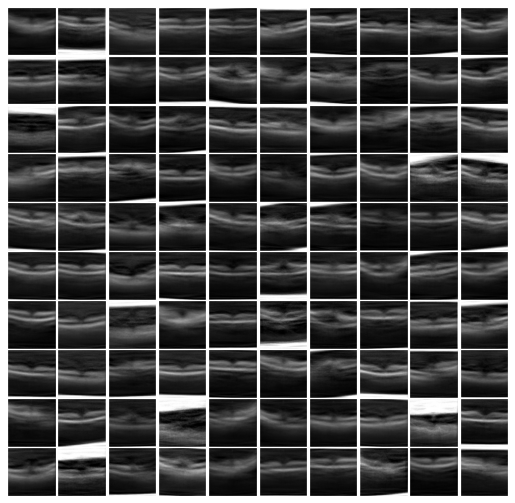

In [156]:
components = pca.transform(ptest_data)
projected = pca.inverse_transform(components)
fig, axes = plt.subplots(10,10,figsize=(9,9), subplot_kw={'xticks':[], 'yticks':[]},
            gridspec_kw=dict(hspace=0.01, wspace=0.01))
for i, ax in enumerate(axes.flat):
    ax.imshow(projected[i].reshape(150, 150, 3),cmap="gray")


In [157]:
rforest = RandomForestClassifier(criterion='entropy', max_depth=15, min_samples_leaf=5)

rforest.fit(ptest_data, ptest_label)
prf_pred = rforest.predict(pval_data)

In [158]:
accuracy_score(pval_label, prf_pred)

1.0

In [159]:
confusion_matrix(pval_label,prf_pred)

array([[8, 0, 0, 0],
       [0, 8, 0, 0],
       [0, 0, 8, 0],
       [0, 0, 0, 8]])

In [160]:
tn, fp, fn, tp = confusion_matrix(pval_label, prf_pred)
pca_specificity = tn / (tn+fp)
pca_sensitivity = tp / (tp+fn)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


In [161]:
pca_specificity 

array([ 1.,  0., nan, nan])

In [162]:
pca_sensitivity 

array([nan, nan,  0.,  1.])

In [163]:
print(classification_report(pval_label, prf_pred))


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         8
         1.0       1.00      1.00      1.00         8
         2.0       1.00      1.00      1.00         8
         3.0       1.00      1.00      1.00         8

    accuracy                           1.00        32
   macro avg       1.00      1.00      1.00        32
weighted avg       1.00      1.00      1.00        32



## Feature selection  HOG

In [ ]:
!pip install -q scikit-image

In [ ]:
import skimage

(496, 512)


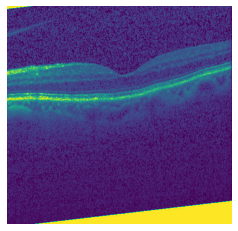

In [ ]:
from skimage.io import imread
from skimage.transform import resize
from skimage.feature import hog
from skimage import exposure
import matplotlib.pyplot as plt
from skimage.util import crop


# reading the image
img = imageio.imread('/content/drive/MyDrive/train/NORMAL/NORMAL-1001666-1.jpeg')
plt.axis("off")
plt.imshow(img)
print(img.shape)


(500, 600)


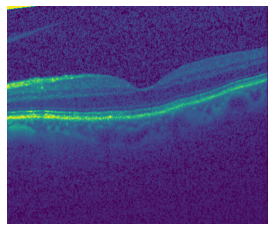

In [ ]:
resized_img = resize(img, (150*4, 150*4))
resized_img = crop(resized_img, ((0,100), (0, 0)))
#resized_img = resized_img.astype(np.uint8)
#gray_img = resized_img/255
plt.axis("off")
plt.imshow(resized_img)
print(resized_img.shape)

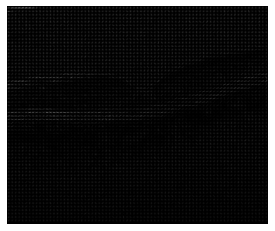

In [ ]:
fd, hog_image = hog(resized_img,  orientations=9, pixels_per_cell=(50, 50), cells_per_block=(25, 25), visualize=True)
plt.axis("off")
plt.imshow(hog_image, cmap="gray")


In [ ]:
fd.shape

(162504,)

In [ ]:
plt.imsave("resized_img.jpg", resized_img)
plt.imsave("hog_image.jpg", hog_image, cmap="gray")


In [ ]:
from skimage import color, data
from skimage.restoration import denoise_wavelet, calibrate_denoiser
import numpy as np
#skimage.restoration.calibrate_denoiser()
resized_img =  color.rgb2gray(resized_img[:50, :50])
rng = np.random.default_rng()
noisy = img + 0.5 * resized_img.std() * rng.standard_normal(resized_img.shape)
parameters = {'sigma': np.arange(0.1, 0.4, 0.02)}
denoising_function = calibrate_denoiser(noisy, denoise_wavelet,denoise_parameters=parameters)
denoised_img = denoising_function(resized_img)

plt.axis("off")
plt.imshow(resized_img)
print(resized_img.shape)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  """
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:263: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims, where=where)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:223: RuntimeWarning: invalid value encountered in true_divide
  subok=False)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


ValueError: ignored

In [ ]:
from skimage import feature
from imutils import paths
import argparse

In [ ]:
# loop over the test dataset
for (i, imagePath) in enumerate(paths.list_images(args["test"])):
	# load the test image, convert it to grayscale, and resize it to
	# the canonical size
	image = cv2.imread(imagePath)
	gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
	logo = cv2.resize(gray, (200, 100))

	# extract Histogram of Oriented Gradients from the test image and
	# predict the make of the car
	(H, hogImage) = feature.hog(logo, orientations=9, pixels_per_cell=(10, 10),cells_per_block=(2, 2), transform_sqrt=True, block_norm="L1", visualize=True)
	pred = model.predict(H.reshape(1, -1))[0]

	# visualize the HOG image
	hogImage = exposure.rescale_intensity(hogImage, out_range=(0, 255))
	hogImage = hogImage.astype("uint8")
	cv2.imshow("HOG Image #{}".format(i + 1), hogImage)

	# draw the prediction on the test image and display it
	cv2.putText(image, pred.title(), (10, 35), cv2.FONT_HERSHEY_SIMPLEX, 1.0,
		(0, 255, 0), 3)
	cv2.imshow("Test Image #{}".format(i + 1), image)
	cv2.waitKey(0)

## 2- Feature Selection Deep Learning

## a-Feature Selection Using CNN

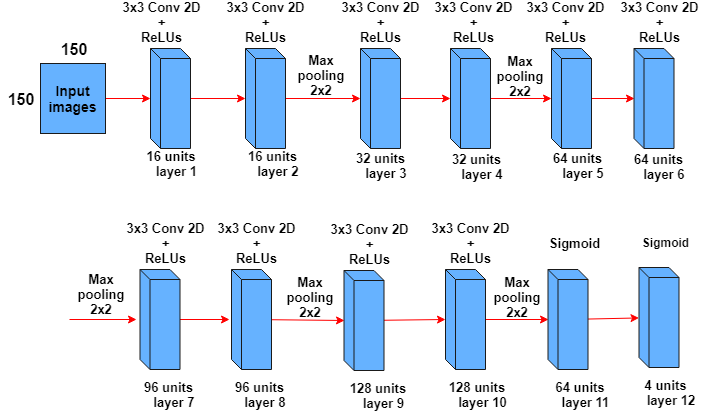

In [72]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
import numpy as np
from tensorflow.keras.optimizers import SGD

In [49]:
kcnn = Sequential()
kcnn.add(Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(150, 150, 3)))
kcnn.add(Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
kcnn.add(MaxPooling2D((2, 2)))
kcnn.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
kcnn.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
kcnn.add(MaxPooling2D((2, 2)))
kcnn.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
kcnn.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
kcnn.add(MaxPooling2D((2, 2)))
kcnn.add(Conv2D(96, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
kcnn.add(Conv2D(96, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
kcnn.add(MaxPooling2D((2, 2)))
kcnn.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
kcnn.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
kcnn.add(MaxPooling2D((2, 2)))
kcnn.add(Conv2D(64, (3, 3), activation='sigmoid', kernel_initializer='he_uniform', padding='same'))
kcnn.add(Conv2D(4, (3, 3), activation='sigmoid', kernel_initializer='he_uniform', padding='same'))
kcnn.add(Dropout(0.2))


In [50]:
kcnn.add(Flatten())
kcnn.add(Dense(4, activation='relu', kernel_initializer='he_uniform'))
kcnn.add(Dense(4, activation='softmax'))

In [51]:
kcnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 150, 150, 16)      448       
                                                                 
 conv2d_6 (Conv2D)           (None, 150, 150, 16)      2320      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 75, 75, 16)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 75, 75, 32)        4640      
                                                                 
 conv2d_8 (Conv2D)           (None, 75, 75, 32)        9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 37, 37, 32)       0         
 2D)                                                  

In [ ]:
def Kermany2018(batch_size,image_size,data_dir):

    '''
    Publication : https://www.cell.com/cell/fulltext/S0092-8674(18)30154-5
    Dataset : https://data.mendeley.com/datasets/rscbjbr9sj/3
    '''
    #train_size = 83484
    #test_size = 1000

    


    train_datagen = ImageDataGenerator(rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   rescale=1.0/255,
                                   horizontal_flip=True,
                                   fill_mode='nearest')
    val_datagen = ImageDataGenerator(rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   rescale=1.0/255,
                                   horizontal_flip=True,
                                   fill_mode='nearest')
    test_datagen = ImageDataGenerator(rescale=1.0/255)

    train_path = data_dir+'/train'
    val_path = data_dir+'/val'
    test_path = data_dir+'/test'

    classes = ['CNV', 'DME','DRUSEN','NORMAL']

    train_batches = train_datagen.flow_from_directory(train_path, target_size=(image_size,image_size),color_mode='rgb', classes=classes, batch_size=batch_size,class_mode='categorical')
    val_batches = val_datagen.flow_from_directory(val_path, target_size=(image_size,image_size),color_mode='rgb', classes=classes, batch_size=batch_size,class_mode='categorical')
    test_batches = test_datagen.flow_from_directory(test_path, target_size=(image_size,image_size),color_mode='rgb', classes=classes, batch_size=batch_size, class_mode='categorical')

    return train_batches, val_batches, test_batches

In [ ]:
train_batches, val_batches, test_batches = Kermany2018(250, 150, '/content/drive/MyDrive/OCT2017_2/OCT2017/')


Found 8253 images belonging to 4 classes.
Found 32 images belonging to 4 classes.
Found 1000 images belonging to 4 classes.


In [ ]:
num_of_classes = 4
train_size = 8253
test_size = 1000
batch_size = 250
epoch = 1
val_size = 32

In [ ]:
opt = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)
kcnn.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = kcnn.fit(test_batches, shuffle=False, steps_per_epoch=(test_size//batch_size), validation_data=val_batches, validation_steps= (val_size//2), epochs=epoch, verbose=1)


4/4 [==============================] - 357s 113s/step - loss: 1.4068 - accuracy: 0.2670 - val_loss: 1.3911 - val_accuracy: 0.2500


In [52]:
kcnn.layers[17]._name='conv11'
print(kcnn.layers[17].name)

conv11


In [54]:
from keras.models import Model

#layer_name = 'conv11'
kcnn_base = Model(inputs=kcnn.input, outputs=kcnn.get_layer('conv11').output)
#kcnn_output = kcnn_base.predict(test_batches)

In [79]:
def cnn_extract_features(directory, sample_count):
  
  features = np.zeros(shape=(sample_count, 4, 4, 4))
  labels = np.zeros(shape=(sample_count))

  datagen = ImageDataGenerator(rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   rescale=1.0/255,
                                   horizontal_flip=True,
                                   fill_mode='nearest')
    
  
  generator = datagen.flow_from_directory(
      directory,
      target_size=(150, 150),
      batch_size = batch_size,
      class_mode ='binary')
 

  i = 0
  for inputs_batch, labels_batch in generator:
    features_batch = kcnn_base.predict(inputs_batch)
    features[i * batch_size : (i + 1) * batch_size] = features_batch
    labels[i * batch_size : (i + 1) * batch_size] = labels_batch
  
    i += 1
    if i * batch_size >= sample_count:
      break
  
  return features, labels

In [74]:
batch_size = 250
epoch = 2

In [80]:
train_featurec, train_labelc = cnn_extract_features('/content/drive/MyDrive/OCT2017_2/OCT2017/train', 2000)
validation_featurec, validation_labelc = cnn_extract_features('/content/drive/MyDrive/OCT2017_2/OCT2017/val', 32)
test_featurec, test_labelc = cnn_extract_features('/content/drive/MyDrive/OCT2017_2/OCT2017/test', 500)

Found 8253 images belonging to 4 classes.
Found 32 images belonging to 4 classes.
Found 1000 images belonging to 4 classes.


In [81]:
train_featurec = np.reshape(train_featurec, (2000, 4 * 4 * 4))
validation_featurec = np.reshape(validation_featurec, (32, 4 * 4 * 4))
test_featurec = np.reshape(test_featurec, (500, 4* 4 * 4))

In [82]:
from sklearn.ensemble import RandomForestClassifier

rforest = RandomForestClassifier(criterion='entropy', max_depth=15, min_samples_leaf=5)

rforest.fit(test_featurec, test_labelc)


RandomForestClassifier(criterion='entropy', max_depth=15, min_samples_leaf=5)

In [83]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(rforest, test_featurec, test_labelc, cv=5)
np.average(scores)
np.mean(scores)

0.37

In [84]:
val_pred = rforest.predict(validation_featurec)

In [85]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy_score(validation_labelc, val_pred)


0.5

In [86]:
confusion_matrix(validation_labelc, val_pred)


array([[5, 3, 0, 0],
       [1, 3, 4, 0],
       [1, 1, 4, 2],
       [2, 1, 1, 4]])

In [87]:
tn, fp, fn, tp = confusion_matrix(validation_labelc, val_pred)
cnn_specificity = tn / (tn+fp)
cnn_sensitivity = tp / (tp+fn)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


In [88]:
cnn_specificity 

array([0.83333333, 0.5       , 0.        ,        nan])

In [89]:
cnn_sensitivity 

array([0.66666667, 0.5       , 0.2       , 0.66666667])

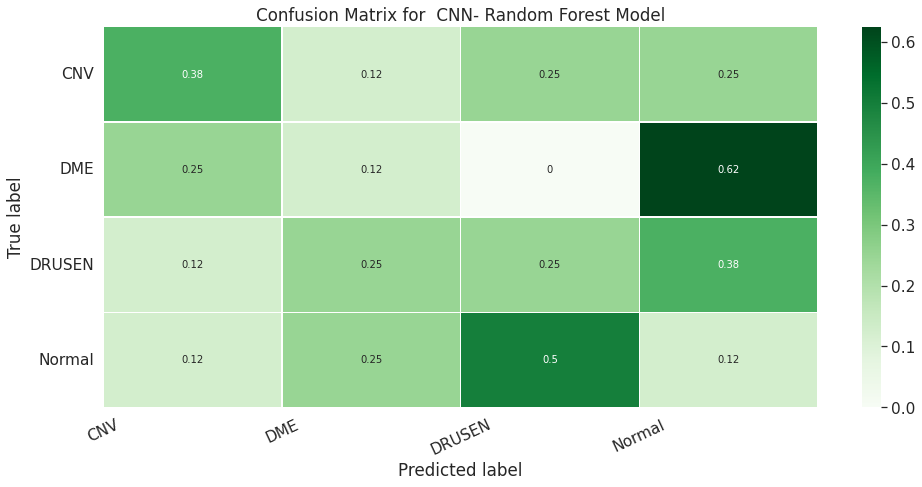

In [174]:
import seaborn as sns

# Get and reshape confusion matrix data
matrix = confusion_matrix(validation_labelc, val_pred)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['CNV', 'DME', 'DRUSEN', 'Normal']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for  CNN- Random Forest Model')
plt.show()

In [91]:
print(classification_report(validation_labelc, val_pred))


              precision    recall  f1-score   support

         0.0       0.56      0.62      0.59         8
         1.0       0.38      0.38      0.38         8
         2.0       0.44      0.50      0.47         8
         3.0       0.67      0.50      0.57         8

    accuracy                           0.50        32
   macro avg       0.51      0.50      0.50        32
weighted avg       0.51      0.50      0.50        32



## b-Feature Selection Using Pretrained CNN 

b1- Feature Selection Using VGGNet

In [66]:

from keras.applications.vgg16 import VGG16
vgg_16 = VGG16()

553476096/553467096 [==============================] - 9s 0us/step


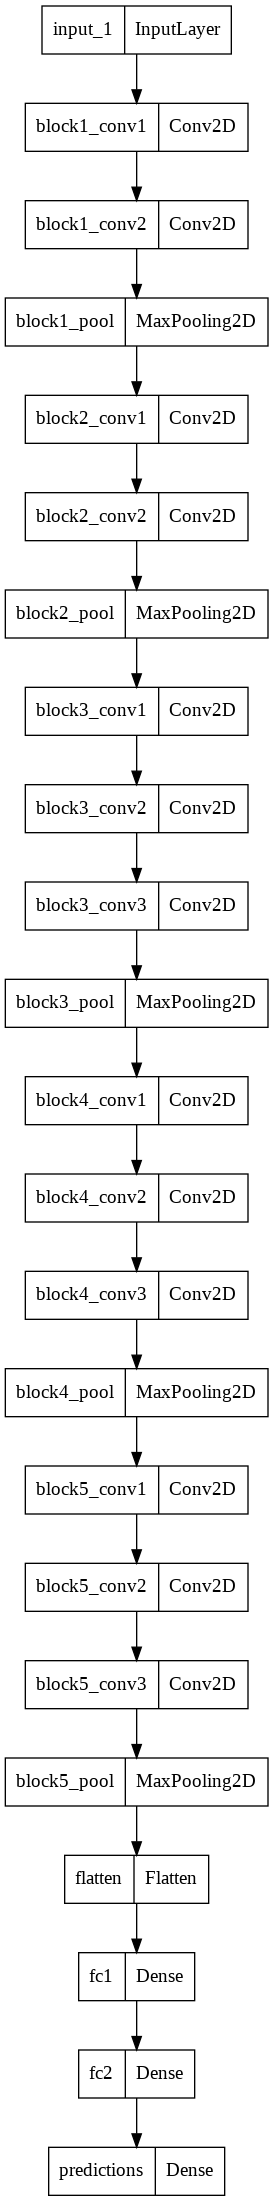

In [ ]:
from keras.utils.vis_utils import plot_model

plot_model(vgg_16, to_file='vgg.png')

In [ ]:
# load the model

print(vgg_16.summary())

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [70]:
num_of_classes = 4
train_size = 8253
test_size = 1000
batch_size = 250
epoch = 2
val_size = 32



In [67]:
vgg16_base = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in vgg16_base.layers:
            layer.trainable = False

vgg16_base.summary()

58900480/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                              

In [68]:
def extract_features(directory, sample_count):
  
  features = np.zeros(shape=(sample_count, 7, 7, 512))
  labels = np.zeros(shape=(sample_count))

  datagen = ImageDataGenerator(rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   rescale=1.0/255,
                                   horizontal_flip=True,
                                   fill_mode='nearest')
    
  
  generator = datagen.flow_from_directory(
      directory,
      target_size=(224, 224),
      batch_size=batch_size,
      class_mode='binary')
 

  i = 0
  for inputs_batch, labels_batch in generator:
    features_batch = vgg16_base.predict(inputs_batch)
    features[i * batch_size : (i + 1) * batch_size] = features_batch
    labels[i * batch_size : (i + 1) * batch_size] = labels_batch
  
    i += 1
    if i * batch_size >= sample_count:
      break
  
  return features, labels

In [69]:
train_features, train_labels = extract_features('/content/drive/MyDrive/OCT2017_2/OCT2017/train', 2000)
validation_features, validation_labels = extract_features('/content/drive/MyDrive/OCT2017_2/OCT2017/val', 32)
test_features, test_labels = extract_features('/content/drive/MyDrive/OCT2017_2/OCT2017/test', 500)

Found 8253 images belonging to 4 classes.
Found 32 images belonging to 4 classes.
Found 1000 images belonging to 4 classes.


In [164]:
train_features = np.reshape(train_features, (2000, 7 * 7 * 512))
validation_features = np.reshape(validation_features, (32, 7 * 7 * 512))
test_features = np.reshape(test_features, (500, 7* 7 * 512))

In [165]:
from sklearn.ensemble import RandomForestClassifier

rforest = RandomForestClassifier(criterion='entropy', max_depth=15, min_samples_leaf=5)

rforest.fit(test_features, test_labels)


RandomForestClassifier(criterion='entropy', max_depth=15, min_samples_leaf=5)

In [166]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(rforest, test_features, test_labels, cv=5)
np.average(scores)
np.mean(scores)

0.72

In [167]:
val_pred = rforest.predict(validation_features)

In [168]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy_score(validation_labels, val_pred)


0.6875

In [169]:
confusion_matrix(validation_labels, val_pred)


array([[4, 1, 3, 0],
       [0, 5, 0, 3],
       [3, 0, 5, 0],
       [0, 0, 0, 8]])

In [170]:
tn, fp, fn, tp = confusion_matrix(validation_labels, val_pred)
vg_specificity = tn / (tn+fp)
vg_sensitivity = tp / (tp+fn)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


In [171]:
vg_specificity 

array([1.        , 0.16666667, 1.        , 0.        ])

In [172]:
vg_sensitivity 

array([ 0., nan,  0.,  1.])

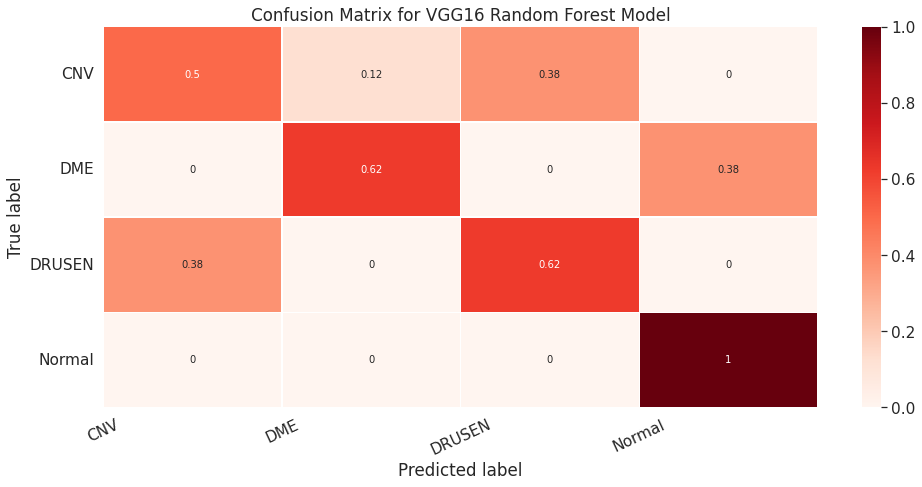

In [175]:
import seaborn as sns

# Get and reshape confusion matrix data
matrix = confusion_matrix(validation_labels, val_pred)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Reds, linewidths=0.2)

# Add labels to the plot
class_names = ['CNV', 'DME', 'DRUSEN', 'Normal']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for VGG16 Random Forest Model')
plt.show()

In [176]:
print(classification_report(validation_labels, val_pred))


              precision    recall  f1-score   support

         0.0       0.57      0.50      0.53         8
         1.0       0.83      0.62      0.71         8
         2.0       0.62      0.62      0.62         8
         3.0       0.73      1.00      0.84         8

    accuracy                           0.69        32
   macro avg       0.69      0.69      0.68        32
weighted avg       0.69      0.69      0.68        32



b2- Feature Selection Using ResNet

In [177]:
#from tf.keras.applications.resnet50 import ResNet50

resnet_50 = tf.keras.applications.resnet50.ResNet50()

resnet_50.summary()

102981632/102967424 [==============================] - 3s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_3[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                        

In [178]:
resnet50_base = tf.keras.applications.resnet50.ResNet50(weights='imagenet', include_top=False, input_shape=(224,224, 3))
resnet50_base.summary()

94781440/94765736 [==============================] - 1s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_4[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                          

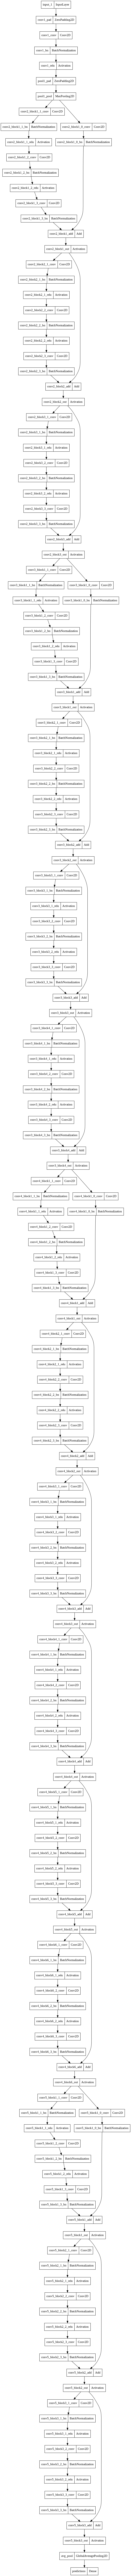

In [ ]:
plot_model(resnet_50, to_file='resnet.png')

In [179]:
def r_extract_features(directory, sample_count):
  
  features = np.zeros(shape=(sample_count, 7, 7, 512 * 4))
  labels = np.zeros(shape=(sample_count))

  datagen = ImageDataGenerator(rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   rescale=1.0/255,
                                   horizontal_flip=True,
                                   fill_mode='nearest')
  
  generator = datagen.flow_from_directory(
      directory,
      target_size=(224, 224),
      batch_size=batch_size,
      class_mode='binary')

  i = 0
  for inputs_batch, labels_batch in generator:
    features_batch = resnet50_base.predict(inputs_batch)
    features[i * batch_size : (i + 1) * batch_size] = features_batch
    labels[i * batch_size : (i + 1) * batch_size] = labels_batch
  
    i += 1
    if i * batch_size >= sample_count:
      break
  
  return features, labels

In [180]:
num_of_classes = 4
train_size = 8253
test_size = 1000
batch_size = 250
epoch = 2
val_size = 32

In [181]:
train_feature, train_label = r_extract_features('/content/drive/MyDrive/OCT2017_2/OCT2017/train', 2000)
validation_feature, validation_label = r_extract_features('/content/drive/MyDrive/OCT2017_2/OCT2017/val', 32)
test_feature, test_label = r_extract_features('/content/drive/MyDrive/OCT2017_2/OCT2017/test', 500)

Found 8253 images belonging to 4 classes.
Found 32 images belonging to 4 classes.
Found 1000 images belonging to 4 classes.


In [182]:
np.array(test_feature).shape

(500, 7, 7, 2048)

In [183]:
train_feature = np.reshape(train_feature, (2000, 7 * 7 * 2048))
validation_feature = np.reshape(validation_feature, (32, 7 * 7 * 2048))
test_feature = np.reshape(test_feature, (500, 7 * 7 * 2048))

In [184]:
from sklearn.ensemble import RandomForestClassifier

rforest = RandomForestClassifier(criterion='entropy', max_depth=15, min_samples_leaf=5)

rforest.fit(test_feature, test_label)


RandomForestClassifier(criterion='entropy', max_depth=15, min_samples_leaf=5)

In [185]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(rforest, test_feature, test_label, cv=5)
np.average(scores)
np.mean(scores)

0.4

In [ ]:
val_pred = rforest.predict(validation_feature)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy_score(validation_label, val_pred)


0.4375

In [ ]:
confusion_matrix(validation_label, val_pred)


array([[6, 1, 1, 0],
       [1, 2, 3, 2],
       [1, 3, 2, 2],
       [2, 0, 2, 4]])

In [ ]:
tn, fp, fn, tp = confusion_matrix(validation_label, val_pred)
rs_specificity = tn / (tn+fp)
rs_sensitivity = tp / (tp+fn)

In [ ]:
rs_specificity 

array([0.71428571, 0.33333333, 0.5       , 0.        ])

In [ ]:
rs_sensitivity 

array([0.5       , 0.66666667, 0.25      , 0.57142857])

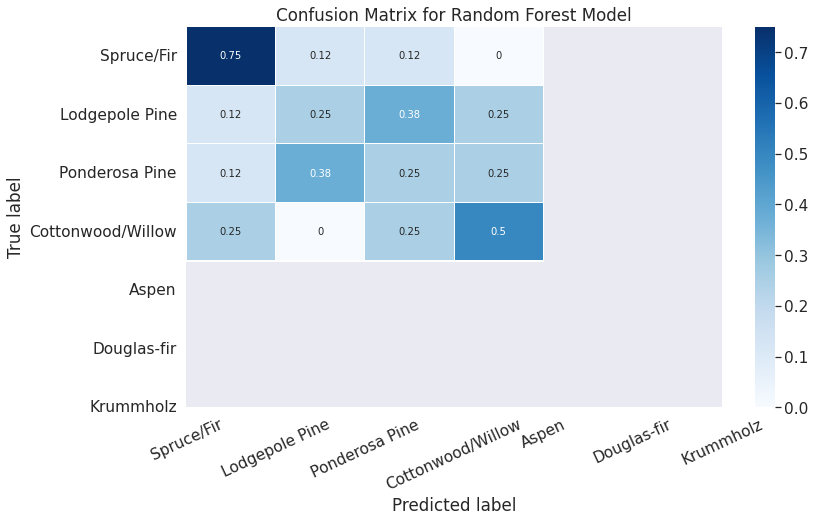

In [ ]:
import seaborn as sns

# Get and reshape confusion matrix data
matrix = confusion_matrix(validation_label, val_pred)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(12,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Blues, linewidths=0.2)

# Add labels to the plot
class_names = ['CNV', 'DME', 'DRUSEN', 'Normal']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Resnet50 Random Forest Model')
plt.show()

In [ ]:
print(classification_report(validation_label, val_pred))


              precision    recall  f1-score   support

         0.0       0.60      0.75      0.67         8
         1.0       0.33      0.25      0.29         8
         2.0       0.25      0.25      0.25         8
         3.0       0.50      0.50      0.50         8

    accuracy                           0.44        32
   macro avg       0.42      0.44      0.43        32
weighted avg       0.42      0.44      0.43        32



b3- Feature Selection Using ZFNet

In [3]:
#coding=utf-8  
from keras.models import Sequential  
from keras.layers import Dense,Flatten,Dropout  
from keras.layers.convolutional import Conv2D,MaxPooling2D  
from keras.utils.np_utils import to_categorical  
import numpy as np  
seed = 7  
np.random.seed(seed)  
  
zf = Sequential()  
zf.add(Conv2D(96,(7,7),strides=(2,2),input_shape=(224,224,3),padding='valid',activation='relu',kernel_initializer='uniform'))  
zf.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))  
zf.add(Conv2D(256,(5,5),strides=(2,2),padding='same',activation='relu',kernel_initializer='uniform'))  
zf.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))  
zf.add(Conv2D(384,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='uniform'))  
zf.add(Conv2D(384,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='uniform'))  
zf.add(Conv2D(256,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='uniform'))  
zf.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))  
zf.add(Flatten())  
zf.add(Dense(4096,activation='relu'))  
zf.add(Dropout(0.5))  
zf.add(Dense(4096,activation='relu'))  
zf.add(Dropout(0.5))  
zf.add(Dense(1000,activation='softmax'))  
zf.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])  
zf.summary()  

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 109, 109, 96)      14208     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 54, 54, 96)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 27, 27, 256)       614656    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 256)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 13, 13, 384)       885120    
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 384)       1

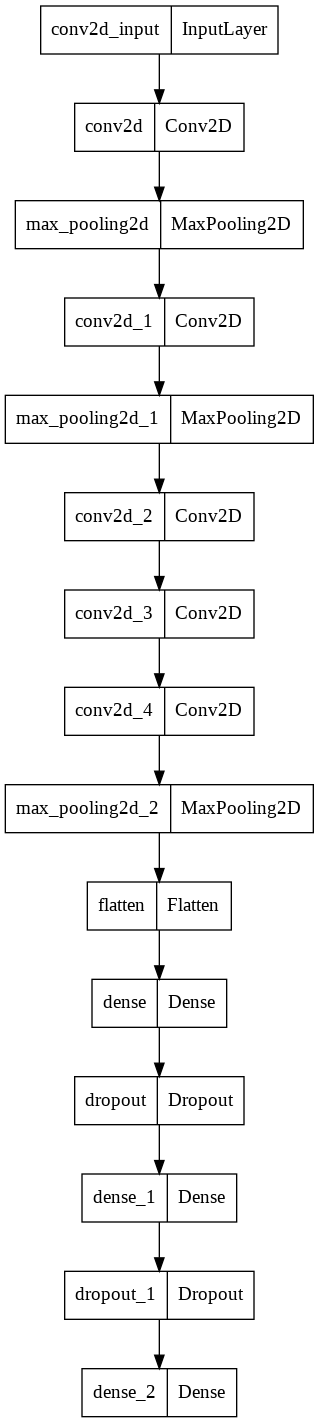

In [ ]:
plot_model(zf, to_file='zfnet.png')

In [13]:
zf.layers[7]._name='conv4'
print(zf.layers[7].name)

conv4


In [14]:
from keras.models import Model

#layer_name = 'conv4'
zf_base = Model(inputs=zf.input, outputs=zf.get_layer('conv4').output)
#zf_output = zf_base.predict(test_batches)

In [17]:
def z_extract_features(directory, sample_count):
  
  features = np.zeros(shape=(sample_count, 6, 6, 256))
  labels = np.zeros(shape=(sample_count))

  datagen = ImageDataGenerator(rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   rescale=1.0/255,
                                   horizontal_flip=True,
                                   fill_mode='nearest')
    
  
  generator = datagen.flow_from_directory(
      directory,
      target_size=(224, 224),
      batch_size=batch_size,
      class_mode='binary')
 

  i = 0
  for inputs_batch, labels_batch in generator:
    features_batch = zf_base.predict(inputs_batch)
    features[i * batch_size : (i + 1) * batch_size] = features_batch
    labels[i * batch_size : (i + 1) * batch_size] = labels_batch
  
    i += 1
    if i * batch_size >= sample_count:
      break
  
  return features, labels

In [10]:
batch_size = 250
epoch = 2 

In [18]:
train_featurez, train_labelz = z_extract_features('/content/drive/MyDrive/OCT2017_2/OCT2017/train', 2000)
validation_featurez, validation_labelz = z_extract_features('/content/drive/MyDrive/OCT2017_2/OCT2017/val', 32)
test_featurez, test_labelz = z_extract_features('/content/drive/MyDrive/OCT2017_2/OCT2017/test', 500)

Found 8253 images belonging to 4 classes.
Found 32 images belonging to 4 classes.
Found 1000 images belonging to 4 classes.


In [19]:
train_featurez = np.reshape(train_featurez, (2000, 6 * 6 * 256))
validation_featurez = np.reshape(validation_featurez, (32, 6 * 6 * 256))
test_featurez = np.reshape(test_featurez, (500, 6 * 6 * 256))

In [20]:
from sklearn.ensemble import RandomForestClassifier

rforest = RandomForestClassifier(criterion='entropy', max_depth=15, min_samples_leaf=5)

rforest.fit(test_featurez, test_labelz)


RandomForestClassifier(criterion='entropy', max_depth=15, min_samples_leaf=5)

In [42]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=5)

KFold(n_splits=2, random_state=None, shuffle=False)

for train_index, test_index in kf.split(test_featurez):
  zf_train, zf_test = test_featurez[train_index], test_featurez[test_index]
  trainz_label, testz_label = test_labelz[train_index], test_labelz[test_index]


In [46]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(rforest, test_featurez, test_labelz, cv=5)
np.average(scores)
np.mean(scores)

0.38

In [21]:
val_pred = rforest.predict(validation_featurez)

In [22]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy_score(validation_labelz, val_pred)


0.4375

In [23]:
confusion_matrix(validation_labelz, val_pred)


array([[5, 1, 2, 0],
       [2, 2, 2, 2],
       [1, 1, 3, 3],
       [1, 2, 1, 4]])

In [32]:
tn, fp, fn, tp = confusion_matrix(validation_labelz, val_pred)
zf_specificity = tn / (tn+fp)
zf_sensitivity = tp / (tp+fn)

In [34]:
zf_specificity 

array([0.71428571, 0.33333333, 0.5       , 0.        ])

In [35]:
zf_sensitivity 

array([0.5       , 0.66666667, 0.25      , 0.57142857])

In [ ]:
from keras.engine.compile_utils import MetricsContainer
from sklearn import metrics

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(4):
    fpr[i], tpr[i], _ = metrics.roc_curve(validation_labelz[:, i], val_pred[:, i])
    roc_auc[i] = MetricsContainer.auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = metrics.roc_curve(validation_labelz.ravel(), val_pred.ravel())
roc_auc["micro"] = metrics.auc(fpr["micro"], tpr["micro"])

In [ ]:
from cycler import cycler


# Plor ROC Curves
# First aggregate all false positive rates

n_classes = 4

all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = metrics.auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycler(["aqua", "darkorange", "cornflowerblue"])
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=2,
        label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "k--", lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Some extension of Receiver operating characteristic to multiclass")
plt.legend(loc="lower right")
plt.show()

In [28]:
from sklearn import metrics

def roc_curve_acc(validation_labelz, val_pred):
    false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(validation_labelz, val_pred)
    roc_auc = metrics.auc(false_positive_rate, true_positive_rate)
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate, true_positive_rate, color='darkorange',label='%s AUC = %0.3f'%(method, roc_auc))
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'b--')
    plt.xlim([-0.1,1.2])
    plt.ylim([-0.1,1.2])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')

roc_curve_acc(validation_labelz, val_pred)
roc_auc_score(y, clf.predict_proba(X), multi_class='ovr'

ValueError: ignored

In [37]:
from sklearn import metrics


# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(4):
    fpr[i], tpr[i] = metrics.roc_curve(validation_labelz[:, i], val_pred[:, i])
    roc_auc[i] = metrics.auc(fpr[i], tpr[i])

   

# Plot of a ROC curve for a specific class
for i in range(4):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

IndexError: ignored

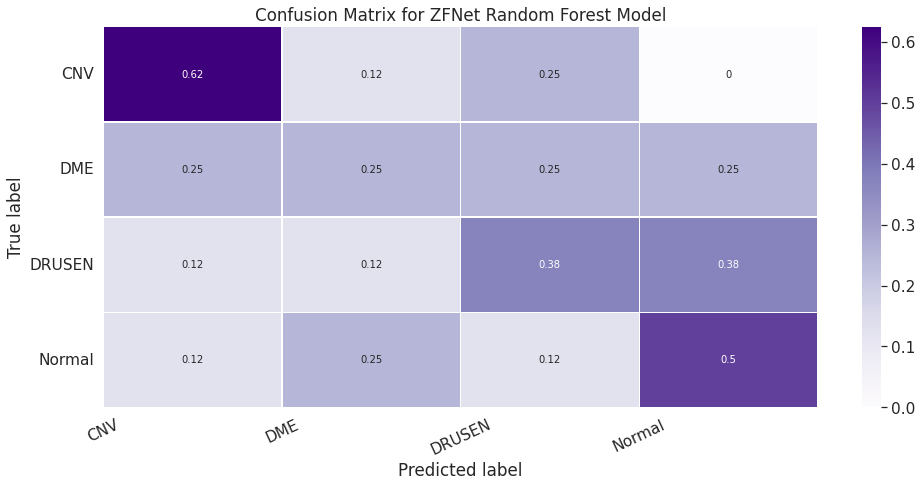

In [30]:
import seaborn as sns

# Get and reshape confusion matrix data
matrix = confusion_matrix(validation_labelz, val_pred)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Purples, linewidths=0.2)

# Add labels to the plot
class_names = ['CNV', 'DME', 'DRUSEN','Normal' ]
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for ZFNet Random Forest Model')
plt.show()

In [26]:
print(classification_report(validation_labelz, val_pred))


              precision    recall  f1-score   support

         0.0       0.56      0.62      0.59         8
         1.0       0.33      0.25      0.29         8
         2.0       0.38      0.38      0.38         8
         3.0       0.44      0.50      0.47         8

    accuracy                           0.44        32
   macro avg       0.43      0.44      0.43        32
weighted avg       0.43      0.44      0.43        32



## c-Feature Selection Using Segmentation
U-Net Xception-style model

In [4]:
from keras import layers


def get_model(img_size, num_classes):
    inputs = keras.Input(shape=img_size + (3,))

    ### [First half of the network: downsampling inputs] ###

    # Entry block
    x = layers.Conv2D(32, 3, strides=2, padding="same")(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    previous_block_activation = x  # Set aside residual

    # Blocks 1, 2, 3 are identical apart from the feature depth.
    for filters in [64, 128, 256]:
        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(filters, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(filters, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.MaxPooling2D(3, strides=2, padding="same")(x)

        # Project residual
        residual = layers.Conv2D(filters, 1, strides=2, padding="same")(
            previous_block_activation
        )
        x = layers.add([x, residual])  # Add back residual
        previous_block_activation = x  # Set aside next residual

    ### [Second half of the network: upsampling inputs] ###

    for filters in [256, 128, 64, 32]:
        x = layers.Activation("relu")(x)
        x = layers.Conv2DTranspose(filters, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.Activation("relu")(x)
        x = layers.Conv2DTranspose(filters, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.UpSampling2D(2)(x)

        # Project residual
        residual = layers.UpSampling2D(2)(previous_block_activation)
        residual = layers.Conv2D(filters, 1, padding="same")(residual)
        x = layers.add([x, residual])  # Add back residual
        previous_block_activation = x  # Set aside next residual

    # Add a per-pixel classification layer
    outputs = layers.Conv2D(num_classes, 3, activation="softmax", padding="same")(x)

    # Define the model
    model = keras.Model(inputs, outputs)
    return model


# Free up RAM in case the model definition cells were run multiple times
keras.backend.clear_session()


In [5]:
# Build model

segment = get_model((224, 3), 4)
segment.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 3, 3)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 112, 2, 32)   896         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 112, 2, 32)  128         ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                                  
 activation (Activation)        (None, 112, 2, 32)   0           ['batch_normalization[0][0]']

In [ ]:
segment.compile(optimizer="rmsprop", loss="sparse_categorical_crossentropy")

callbacks = [keras.callbacks.ModelCheckpoint("oxford_segmentation.h5", save_best_only=True)]

# Train the model, doing validation at the end of each epoch.
epochs = 2

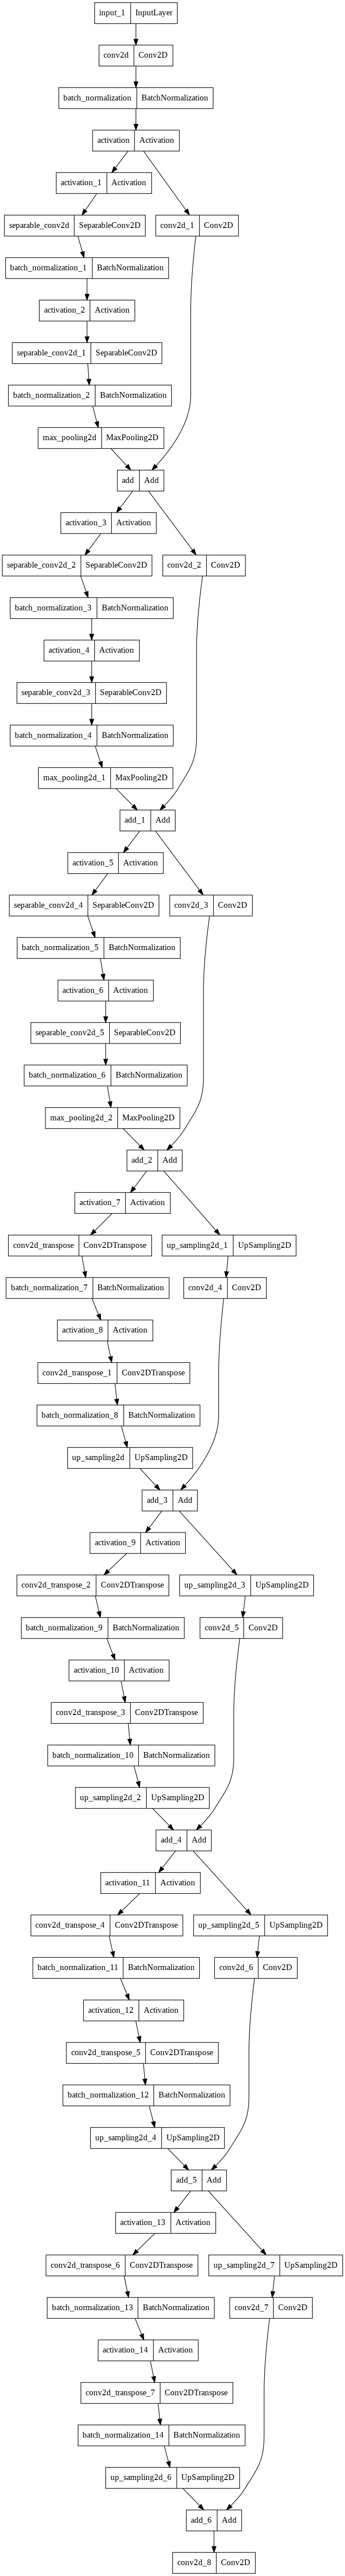

In [ ]:
plot_model(segment, to_file='segment.png')

In [1]:
def s_extract_data(directory, batch_size, data_size):
  
  inputs = np.zeros(shape=(batch_size, 224, 224, 3))
  labels = np.zeros(shape=(batch_size))

  datagen = ImageDataGenerator(rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   rescale=1.0/255,
                                   horizontal_flip=True,
                                   fill_mode='nearest')
    
  
  generator = datagen.flow_from_directory(
      directory,
      target_size=(224, 224),
      batch_size=batch_size,
      class_mode='binary')
 
  data = []
  label = []
  n = 0

  for n in range(data_size // batch_size):

    for inputs_batch, labels_batch in generator:

      label.append(labels_batch)
      data.append(inputs_batch)
    else:
      break
  
  return data, label

In [2]:
epoch = 2
batch_size = 150

In [ ]:
train_data, train_labelss = s_extract_data('/content/drive/MyDrive/OCT2017_2/OCT2017/train', 150, 2000)
validation_data, validation_labelss = s_extract_data('/content/drive/MyDrive/OCT2017_2/OCT2017/val', 150, 32)
test_data, test_labelss = s_extract_data('/content/drive/MyDrive/OCT2017_2/OCT2017/test', 150, 500)

Found 8253 images belonging to 4 classes.


In [ ]:
train_data = np.reshape(train_data, (2000,224 * 224 * 3))
validation_data = np.reshape(validation_data, (32, 224 * 224 * 3))
test_data = np.reshape(test_data, (500, 224* 224 * 3))

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rforest = RandomForestClassifier(criterion='entropy', max_depth=15, min_samples_leaf=5)

rforest.fit(test_data, test_labelss)


RandomForestClassifier(criterion='entropy', max_depth=15, min_samples_leaf=5)

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(rforest, test_datagen, test_labelss, cv=5)
np.average(scores)
np.mean(scores)

0.38

In [ ]:
val_pred = rforest.predict(validation_data)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy_score(validation_labelss, val_pred)


0.4375

In [ ]:
confusion_matrix(validation_labelss, val_pred)


array([[4, 0, 4, 0],
       [1, 2, 0, 5],
       [5, 1, 0, 2],
       [0, 0, 0, 8]])

In [ ]:
tn, fp, fn, tp = confusion_matrix(validation_labelss, val_pred)
sg_specificity = tn / (tn+fp)
sg_sensitivity = tp / (tp+fn)

In [ ]:
sg_specificity 

array([0.71428571, 0.33333333, 0.5       , 0.        ])

In [ ]:
sg_sensitivity 

array([0.5       , 0.66666667, 0.25      , 0.57142857])

In [ ]:
def roc_curve_acc(validation_labelss, val_pred):
    false_positive_rate, true_positive_rate, thresholds = roc_curve(validation_labelss, val_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate, true_positive_rate, color='darkorange',label='%s AUC = %0.3f'%(method, roc_auc))
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'b--')
    plt.xlim([-0.1,1.2])
    plt.ylim([-0.1,1.2])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')

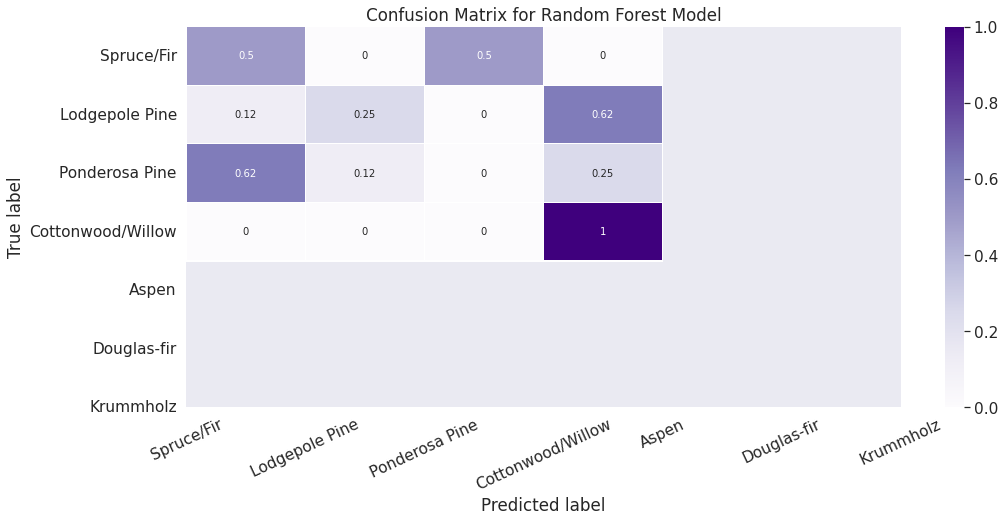

In [ ]:
import seaborn as sns

# Get and reshape confusion matrix data
matrix = confusion_matrix(validation_labelss, val_pred)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Pinks, linewidths=0.2)

# Add labels to the plot
class_names = ['CNV', 'DME', 'DRUSEN', 'Normal']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for UNet-XCeption Random Forest Model')
plt.show()

In [ ]:
print(classification_report(validation_labelss, val_pred))


              precision    recall  f1-score   support

         0.0       0.40      0.50      0.44         8
         1.0       0.67      0.25      0.36         8
         2.0       0.00      0.00      0.00         8
         3.0       0.53      1.00      0.70         8

    accuracy                           0.44        32
   macro avg       0.40      0.44      0.38        32
weighted avg       0.40      0.44      0.38        32



In [ ]:
from keras.models import *
from keras.layers import *

from .config import IMAGE_ORDERING
from .model_utils import get_segmentation_model
from .vgg16 import get_vgg_encoder
from .mobilenet import get_mobilenet_encoder
from .basic_models import vanilla_encoder
from tf.keras.applications.resnet50 import get_resnet50_encoder


def segnet_decoder(f, n_classes, n_up=3):

    assert n_up >= 2

    o = f
    o = (ZeroPadding2D((1, 1), data_format=IMAGE_ORDERING))(o)
    o = (Conv2D(512, (3, 3), padding='valid', data_format=IMAGE_ORDERING))(o)
    o = (BatchNormalization())(o)

    o = (UpSampling2D((2, 2), data_format=IMAGE_ORDERING))(o)
    o = (ZeroPadding2D((1, 1), data_format=IMAGE_ORDERING))(o)
    o = (Conv2D(256, (3, 3), padding='valid', data_format=IMAGE_ORDERING))(o)
    o = (BatchNormalization())(o)

    for _ in range(n_up-2):
        o = (UpSampling2D((2, 2), data_format=IMAGE_ORDERING))(o)
        o = (ZeroPadding2D((1, 1), data_format=IMAGE_ORDERING))(o)
        o = (Conv2D(128, (3, 3), padding='valid',
             data_format=IMAGE_ORDERING))(o)
        o = (BatchNormalization())(o)

    o = (UpSampling2D((2, 2), data_format=IMAGE_ORDERING))(o)
    o = (ZeroPadding2D((1, 1), data_format=IMAGE_ORDERING))(o)
    o = (Conv2D(64, (3, 3), padding='valid', data_format=IMAGE_ORDERING))(o)
    o = (BatchNormalization())(o)

    o = Conv2D(n_classes, (3, 3), padding='same',
               data_format=IMAGE_ORDERING)(o)

    return o


def _segnet(n_classes, encoder,  input_height=416, input_width=608,
            encoder_level=3):

    img_input, levels = encoder(
        input_height=input_height,  input_width=input_width)

    feat = levels[encoder_level]
    o = segnet_decoder(feat, n_classes, n_up=3)
    model = get_segmentation_model(img_input, o)

    return model


def segnet(n_classes, input_height=416, input_width=608, encoder_level=3):

    model = _segnet(n_classes, vanilla_encoder,  input_height=input_height,
                    input_width=input_width, encoder_level=encoder_level)
    model.model_name = "segnet"
    return model


if __name__ == '__main__':
    m = vgg_segnet(101)
    m = segnet(101)
    # m = mobilenet_segnet( 101 )
    # from keras.utils import plot_model
    # plot_model( m , show_shapes=True , to_file='model.png')


ImportError: ignored

In [ ]:
# how to compute the numer of trainable and non trainable weights in a model

from keras import backend as K
import numpy

trainable_count = int(numpy.sum([K.count_params(p) for p in set(model.trainable_weights)]))

non_trainable_count = int(numpy.sum([K.count_params(p) for p in set(model.non_trainable_weights)]))

print(trainable_count,non_trainable_count)

3996394 0


In [ ]:
# how to compute the memory allocated by the activations of a model

batch = 1
shapes_count = int(numpy.sum([numpy.prod(numpy.array([s if isinstance(s, int) 
                                                      else 1 for s in l.output_shape])) 
                              for l in model.layers]))
memory = shapes_count * 4 * batch

print(memory)

3643436
